# Importation des données

In [26]:
import pandas as pd

# Remplacez 'chemin_vers_votre_fichier' par le chemin de votre fichier Excel
fichier_excel = 'Données.xlsx'

# Importation du fichier Excel
df = pd.read_excel(fichier_excel, header=4)

# Affichage des premières lignes du DataFrame
print(df.head(5))


    Code       Libellé  Densité de population 2020  Potentiel financier 2023  \
0  11001  Aigues-Vives                       53.87                    413451   
1  11002        Airoux                       30.97                    139410   
2  11003          Ajac                       38.00                    141594   
3  11004       Alaigne                       24.31                    192021   
4  11005       Alairac                       81.73                    754568   

  Médiane du revenu disponible par UC 2020  \
0                                    17770   
1                                    22990   
2                                    21770   
3                                    18460   
4                                    21650   

   Part des ménages disposant d'au moins une voiture 2020  \
0                                               89.4        
1                                               93.8        
2                                               93.6       

# Remplacement des NA par 0

In [27]:
# Pour chaque colonne dans le DataFrame
for col in df.columns:
    # Convertir les valeurs en numériques, en remplaçant les non-numériques par 0
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)

# Calcul des moyennes sans prendre en compte les 0

In [28]:
# Calcul de la moyenne pour chaque colonne, en excluant les 0
moyennes = df.apply(lambda col: col[col != 0].mean())

# Affichage des moyennes
print(moyennes)

Code                                                                                               11220.616628
Libellé                                                                                                     NaN
Densité de population 2020                                                                            50.840069
Potentiel financier 2023                                                                          806124.997691
Médiane du revenu disponible par UC 2020                                                           19906.168831
Part des ménages disposant d'au moins une voiture 2020                                                92.817090
Part des ménages dont la famille principale est une famille monoparentale 2020                        11.348750
Part des personnes de 75 ans et plus vivant seules 2020\nEnsemble                                     44.726316
Part des diplomés du supérieur parmi les 15 ans et plus non scolarisés 2020\nEnsemble                 27

# Renommer les colonnes

In [36]:
df = df.rename(columns={'Densité de population 2020': 'Densité population'})
df = df.rename(columns={'Potentiel financier 2023': 'Potentiel financier'})
df = df.rename(columns={'Médiane du revenu disponible par UC 2020': 'Médiane revenu'})
df = df.rename(columns={"Part des ménages disposant d'au moins une voiture 2020": 'Ménages avec 1 voiture'})
df = df.rename(columns={'Part des ménages dont la famille principale est une famille monoparentale 2020': 'Ménages monoparentale'})
df = df.rename(columns={'Part des personnes de 75 ans et plus vivant seules 2020\nEnsemble': '75 ans et plus vivant seules'})
df = df.rename(columns={'Part des diplomés du supérieur parmi les 15 ans et plus non scolarisés 2020\nEnsemble': 'diplomés'})
df = df.rename(columns={'Part des non diplomés parmi les 15 ans et plus non scolarisés 2020\nEnsemble': 'non diplomés'})
df = df.rename(columns={'Indice de vieillissement 2020': 'Indice vieillissement'})
df = df.rename(columns={"Temps d'accès au chef lieu de proximité": 'Temps chef lieu'})
df = df.rename(columns={"Temps d'accès aux bibliothèques": 'Temps bibliothèques'})
df = df.rename(columns={"Temps d'accès aux collèges": 'Temps collèges'})
df = df.rename(columns={'Part des "cadres et professions intellectuelles supérieures" dans la population 2020\nEnsemble': 'Part cadres'})
df = df.rename(columns={'Part des "ouvriers" dans la population 2020\nEnsemble': 'Part ouvriers'})
df = df.rename(columns={'Taux de chômage des 15 ans et plus (RP) 2020': 'Taux chômage 15 ans et plus'})
df = df.rename(columns={'Densité de logements sociaux': 'Densité logements sociaux'})

SyntaxError: unterminated string literal (detected at line 4) (<ipython-input-36-16872b9b6355>, line 4)

# Remplacement des 0 par la moyenne

In [29]:
# Remplacement des 0 par la moyenne de la colonne respective
for col in df.columns:
    df[col] = df[col].replace(0, moyennes[col])

# Normalisation des données

In [30]:
# Normalisation des données en utilisant la méthode Min-Max
normalized_df = (df - df.min()) / (df.max() - df.min())

# Radar plot

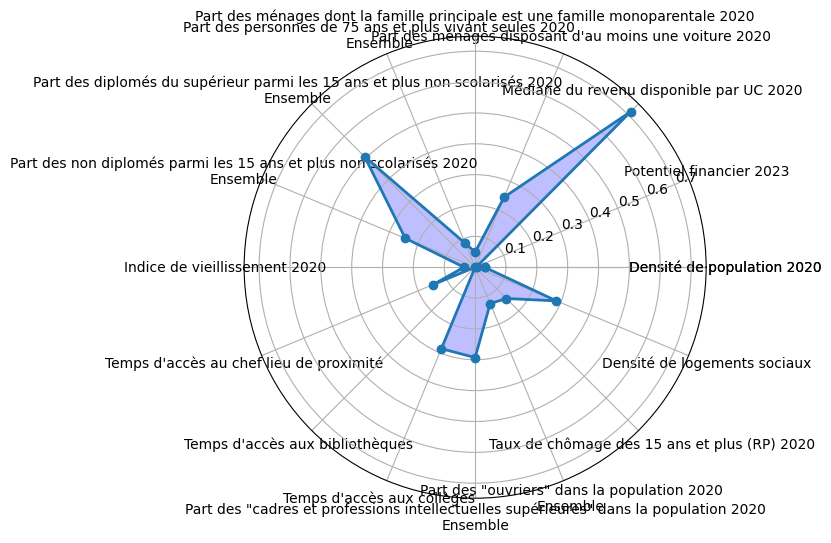

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Exclure les colonnes "code" et "libellé" du DataFrame
cols_to_exclude = ["Code", "Libellé"]
df_for_plot = normalized_df.drop(cols_to_exclude, axis=1)

# Sélectionnez la ligne que vous souhaitez tracer (par exemple, la première ligne)
ligne = df_for_plot.iloc[10]

# Préparation des données pour le radar plot
labels = np.array(df_for_plot.columns)
stats = ligne.values

# Nombre de variables
num_vars = len(labels)

# Calcul de l'angle de chaque axe
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Le graphique est circulaire, donc nous devons "compléter la boucle"
stats = np.concatenate((stats, [stats[0]]))
angles += angles[:1]
labels = np.concatenate((labels, [labels[0]]))  # S'assurer que les labels forment une boucle complète

# Initialisation du radar plot
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Dessin des lignes
ax.fill(angles, stats, 'b', alpha=0.25)
ax.plot(angles, stats, 'o-', linewidth=2)

# Affectation des labels
ax.set_thetagrids(np.degrees(angles), labels)

# Affichage du radar plot
plt.show()
